In [27]:
## Libreria de control
try:
  from control.matlab import *
except:
  !pip install control
  from control.matlab import *
    
## Libreria para graphicar
import matplotlib.pyplot as plt
import numpy

## Libreria para animaciones
from matplotlib.animation import FuncAnimation
plt.rcParams["animation.html"] = "html5"#"jshtml"

## Libreria para importar Iframe de Youtube
from IPython.display import IFrame

# Sistemas Lineales
_Adentrandonos en la matemática del asunto_

# Hasta el momento
_Sabemos_

- Lo básico del control
- Plataformas moviles

Pero necesitamos más rigor!

# Necesitamos Modelos 

- Suficientemente generales
- Suficientemente simples
- Suficientemente expresivos
- Suficientemente relevantes

**de sistemas lineales**

# Controlando una masa puntual

![](3-masa-puntual.png)

Dada una masa puntual sobre una linea, cuya aceleración is directamente controlada:

$$\ddot{p} = u$$

Escribiendo la ecuación diferencial en una forma más general (espacio de estados tenemos):

$$\array{
x_1 = p &&& \dot{x}_1 = x_2 \\
x_2 = \dot{p} &&& \dot{x}_2 = u
}$$

# Forma de la ecuación en espacio de estados

Tenemos que la derivada de la posición ($x_1$) es la velocidad $\dot{x}_1 = x_2$ y que la derivada de la velocidad ($x_2$) es la aceleración $\dot{x}_2=u$, el estado del sistema es "2-dimensional":

$$x=\left[\array{x_1\\x_2}\right]$$

La ecuación de estado es:

$$\dot{x}=\left[\array{\dot{x}_1\\\dot{x}_2}\right]=\left[\array{x_2\\u}\right]=\left[\array{0&1\\0&0}\right]\left[\array{x_1\\x_2}\right]+\left[\array{0\\1}\right]u$$

La ecuación de salida es:

$$y=p=x_1=\left[\array{1&0}\right]x$$

# Forma general del espacio de estados

Teniendo esto,

$$\dot{x}=\left[\array{\dot{x}_1\\\dot{x}_2}\right]=\left[\array{x_2\\u}\right]=\left[\array{0&1\\0&0}\right]\left[\array{x_1\\x_2}\right]+\left[\array{0\\1}\right]u$$

$$y=p=x_1=\left[\array{1&0}\right]x$$

Podemos llevarlo a:

$$\array{\dot{x}=Ax+Bu\\y=Cx}$$

donde, para este caso:

$$\array{A=\left[\array{0&1\\0&0}\right]&B=\left[\array{0\\1}\right]&C=\left[\array{1&0}\right]}$$

# Caso para un masa puntual en dos dimensiones

Teniendo las ecuaciones diferenciales :

$$\array{\ddot{p}_x=u_x&&&\ddot{p}_y=u_y}$$


encontrar las matrices $A$, $B$ y $C$.

siendo: 
- el estado del sistema 
  $$x^T=\left[\array{p_x&\dot{p}_x&p_y&\dot{p}_y}\right]^T$$ 
- la entrada del sistema 
  $$u^T=\left[\array{u_x&u_y}\right]^T$$
- la salida del sistema
  $$y^T=\left[\array{p_x&p_y}\right]^T$$

# Caso para un masa puntual en dos dimensiones

Podemos llevarlo a:

$$\array{\dot{x}=Ax+Bu\\y=Cx}$$

donde, para este caso:

$$\array{A=\left[\array{0&1&0&0\\0&0&0&0\\0&0&0&1\\0&0&0&0}\right]&B=\left[\array{0&0\\1&0\\0&0\\0&1}\right]&C=\left[\array{1&0&0&0\\0&0&1&0}\right]}$$

# Sistema LTI

Los sistemas LTI (_Linear Time-Invariant_) se pueden representar en el espacio de estados. 

$$\array{\dot{x}=Ax+Bu\\y=Cx}$$

dependiento de la dimensionalidad del estado $x$, la entrada $u$ y la salida $y$. Las matrices de la ecuación anterior se veran afectadas.

$$\cases{x\in\mathfrak{R}^n\\u\in\mathfrak{R}^m\\y\in\mathfrak{R}^p} \qquad\to\qquad \array{A:n\times n\\B:n\times m\\C:p\times n}$$

siendo $n$ el número de variables de estado, $m$ el número de entradas y $p$ el número de salidas

# Modelo en espacio de estados

Teniendo el estado $x$, la entrada $u$ y la salida $y$. 

![](3-ecuacion.png)

Surgen tres preguntas:

- ¿De dónde surgen dichos sistemas?
- ¿Cómo interpretar dichos sistemas?
- ¿Cómo selecionamos la entrada?

# Ejemplo 1: Model del carro

Empezando de la ecuación diferencial :

$$\dot{v}=\frac{c}{m}\, u - \gamma\, v$$

- realicemos la ecuación en espacio de estados para el control de velocidad $v$
- realicemos la ecuación en espacio de estados para el control de posición $p$

## Para el control de la velocidad del carro

- El estado es la velocidad $x=v$, luego: 

$$\array{\dot{x}=Ax+Bu\\y=Cx}$$

donde,

$$\array{A=\left[\array{-\gamma}\right]&B=\left[\array{\frac{c}{m}}\right]&C=\left[\array{1}\right]}$$

## Para el control de la posición del carro

- El estado es la posición y la velocidad $x^T=\left[\array{p&v}\right]$, luego: 

$$\array{\dot{x}=Ax+Bu\\y=Cx}$$

donde,

$$\array{A=\left[\array{0&1\\0&-\gamma}\right]&B=\left[\array{0\\\frac{c}{m}}\right]&C=\left[\array{1&0}\right]}$$

# Ejemplo 2: Péndulo

De la 2da ley de Newton tenemos:

$$\ddot{\theta}=-\frac{g}{l}\sin{\theta}+c\,u$$

_Encontremos la ecuación en espacio de estados_ ⚠️

**El sistema no es lineal**

Aproximemos para angulos pequeños $\theta <<1 $, $\sin\theta \approx \theta$

## Para angulos pequeños el pendulo

El estado es la posición y la velocidad angular $x^T=\left[\array{\theta&\dot\theta}\right]$, luego: 

$$\array{\dot{x}=Ax+Bu\\y=Cx}$$

donde,

$$\array{A=\left[\array{0&1\\-\frac{g}{l}&0}\right]&B=\left[\array{0\\c}\right]&C=\left[\array{1&0}\right]}$$

# Ejemplo 3: Dos robots simples sobre una linea

Consideremos el control de dos robots sobre una linea a los cuales se les puede dar la orden directamente en velocidad.

![](3-dos-robots.png)

_Encontremos la ecuación en espacio de estados_ ⚠️

$$\array{\dot{x}=Ax+Bu\\y=Cx}$$

donde,

$$\array{A=0&B=\left[\array{1&0\\0&1}\right]&C=\left[\array{1&0\\0&1}\right]}$$

**¿Cómo hacemos para que se encuentren en el mismo lugar?**

## Problema del _"Rendezvous"_

**¿Cómo hacemos para que se encuentren en el mismo lugar?**

Idea 💡 : Hacer que se diriga el uno al otro;

$$\cases{u_1=x_2-x_1\\u_2=x_1-x_2}$$

¿Cómo queda la ecuación de estado remplazando esta ley de control? 

$$\dot{x}=\left[\array{-1&1\\1&-1}\right]x$$

## Simulación del problema 

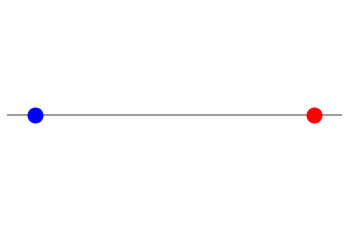

In [36]:
dosRobots = ss([[-1,1],[1,-1]],[[0],[0]],[[1,0],[0,1]],[[0],[0]])
yout, T = step(dosRobots,X0=[-10,10])

fig, ax = plt.subplots();

ax.plot([-12,12],[0,0],color='gray')
ax.axis('off')
#ax.plot([0,0],[-1,1],color='r')
plt.xlim(-12,12);
l, = ax.plot([-10],[0],color='b',marker='.',markersize=30)
r, = ax.plot([10],[0],color='r',marker='.',markersize=30)

def animate(i):
    l.set_data([yout[i,0]], [0])
    r.set_data([yout[i,1]], [0])

ani = FuncAnimation(fig, animate, frames=len(T), interval=1000/40);

In [37]:
display(ani)

# Ejemplo 4: Robot uniciclo

<img src="3-robot-uniciclo.png" width="120px"/>

Donde sus ecuaciones diferenciales son: 

$$\array{\dot{x}=v\cos\phi\\\dot{y}=v\sin\phi\\\dot\phi=w}$$

el sistema es no lineal, ¿Podemos usar la aproximación de angulos pequeños? 

No, sigue siendo no lineal:

$$\array{\dot{x}=v\\\dot{y}=v\phi\\\dot\phi=w}$$

```
“Classifying systems as linear and non-linear is like
classifying objects in the Universe as bananas and
non-bananas.” - Unknown
``` 

# Linealización

Dado un sistema no lineal:

$$\array{\dot{x}=f(x,u)&&y=h(x)}$$

vamos a querer encontrar un modelo lineal "local" al rededor de un punto de operación.

$$(x_o,u_o) \to (x = x_o + \delta x, u= u_o+ \delta u)$$

con esto las ecuaciones de movimiento se transforman en:

$$\dot{\delta x}=\dot{x}-\dot{x}_o = f\left(x_o + \delta x, u_o+ \delta u\right)$$

# Linealización 

$$\dot{\delta x}=\dot{x}-\dot{x}_o = f\left(x_o + \delta x, u_o+ \delta u\right)$$

realizando una expansión en serie de Taylor:

$$\dot{\delta x}\approx f\left(x_o,u_o\right)+\frac{\partial f}{\partial x}\left(x_o,u_o\right)\delta x + \frac{\partial f}{\partial u}\left(x_o,u_o\right)\delta u \,+ \mathscr{O}^2$$

$$y=h\left(x_o+\delta x\right)\approx h\left(x_o\right)+\frac{\partial h}{\partial x}\left(x_o\right) \delta x \,+ \mathscr{O}^2$$

asumiendo que:

$$\array{f\left(x_o,u_o\right)=0&&h\left(x_o\right)=0}$$

# Linealización

tendremos:

$$\array{
\cases{
    \dot{x}=f(x,u)\\
    y=h(x)\\ \\
    f\left(x_o,u_o\right)=0\\
    h\left(x_o\right)=0}
&&
\array{x = x_o + \delta x\\u= u_o+ \delta u\\ \to}
&&
\cases{
\dot{\delta x}=A\delta x + B\delta u \\
y = C \delta x
\\ \\
A = \frac{\partial f}{\partial x}\left(x_o,u_o\right) \\
B = \frac{\partial f}{\partial u}\left(x_o,u_o\right) \\
C = \frac{\partial h}{\partial x}\left(x_o\right)
}
}$$

# Computando los Jacobianos

Teniendo que $x\in\mathfrak{R}^n$, $u\in\mathfrak{R}^m$, $y\in\mathfrak{R}^p$ y

$$\array{f^T = \left[\array{f_1&f_2&\cdots&f_n}\right]^T&&&h^T = \left[\array{h_1&h_2&\cdots&h_p}\right]^T}$$

tendremos entonces:

$$\array{
\frac{\partial f}{\partial x} =
\left[\array{
\frac{\partial f_1}{\partial x_1} & \cdots & \frac{\partial f_1}{\partial x_n} \\
\vdots & \ddots & \vdots \\
\frac{\partial f_n}{\partial x_1} & \cdots & \frac{\partial f_n}{\partial x_n} \\
}\right]_{(n\times n)} &&
\frac{\partial f}{\partial u} =
\left[\array{
\frac{\partial f_1}{\partial u_1} & \cdots & \frac{\partial f_1}{\partial u_m} \\
\vdots & \ddots & \vdots \\
\frac{\partial f_n}{\partial u_1} & \cdots & \frac{\partial f_n}{\partial u_m} \\
}\right]_{(n\times m)} &&
\frac{\partial h}{\partial x} =
\left[\array{
\frac{\partial h_1}{\partial x_1} & \cdots & \frac{\partial h_1}{\partial x_n} \\
\vdots & \ddots & \vdots \\
\frac{\partial h_p}{\partial x_1} & \cdots & \frac{\partial h_p}{\partial x_n} \\
}\right]_{(p\times n)}
}$$

# Ejemplo 5: Péndulo Invertido

<img src="3-pendulo-invertido.png" width="100px"/>

Partiendo de la ecuación diferencial:

$$\ddot{\theta} = \frac{g}{l}\sin\theta + u\cos\theta$$

teniendo el estado como $x^T = \left[\array{\theta &\dot{\theta}}\right]^T$

1. Definamos la ecuación de estado y de salida del sistema no linear.
2. Encontremos las matrices de las ecuaciones de estados lineales, teniendo en cuenta $(x_o,u_o)=(0,0)$.

$$\array{A=\left[\array{0&1\\\frac{g}{l}&0}\right]&B=\left[\array{0\\1}\right]&C=\left[\array{1&0}\right]}$$

# Ejemplo 6: Linealización del uniciclo

<img src="3-robot-uniciclo.png" width="120px"/>

$$\array{
\array{\dot{x}=v\cos\phi\\\dot{y}=v\sin\phi\\\dot\phi=w} & 
\left\{\array{
x_1 = x & x_2 = y & x_3 = \phi \\
y_1 = x_1 & y_2 = x_2 & y_3 = x_3 \\
u_1 = u & u_2 = w 
}\right. & (x_o,u_o)=(0,0)
}$$

¿Qué pasa con $\dot{x}_2 = 0$?

# Comentarios sobre la linealización

- Algunas veces la linealización da modelos razonables y otras veces no.
- A pesar de que son aproximaciones locales, estos modelos son muy utiles cuando funcionan. 